## Description: This model uses R.N.N to predict closing stock prices of Netflix

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import pandas_datareader as dr

Using TensorFlow backend.


In [2]:
df = dr.get_data_yahoo('NFLX' , start='2012-01-01', end = '2020-05-08')

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,10.388572,10.018572,10.040000,10.320000,29213800.0,10.320000
2012-01-04,11.567142,10.258572,10.335714,11.492857,100489900.0,11.492857
2012-01-05,11.694285,11.040000,11.345715,11.328571,86552900.0,11.328571
2012-01-06,12.471429,11.242857,11.302857,12.327143,125610800.0,12.327143
2012-01-09,14.235714,12.448571,12.801429,14.025714,214073300.0,14.025714


In [4]:
df.shape

(2101, 6)

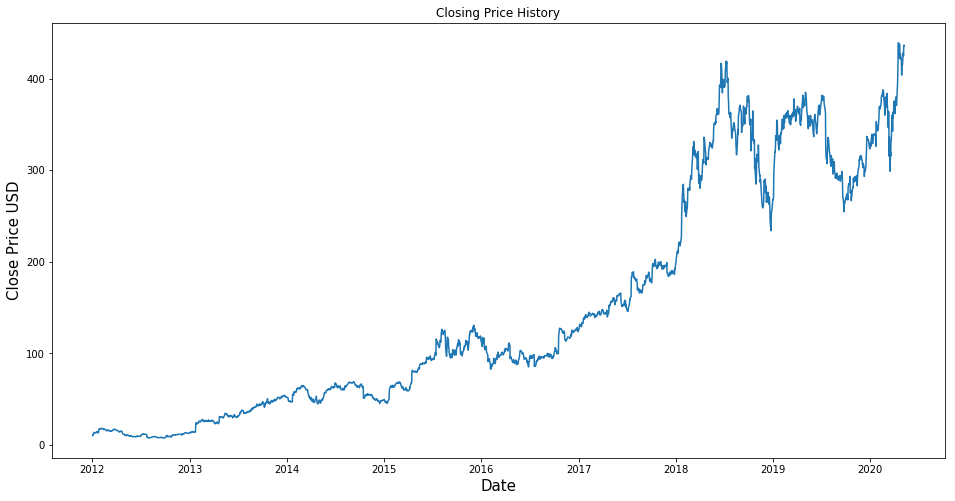

In [5]:
# visualzing the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Adj Close'])
plt.xlabel('Date', fontsize = 15)
plt.ylabel("Close Price USD" , fontsize = 15)
plt.show()

In [6]:
## create a new dataframe with only 'adj close' column
data = df[['Adj Close']]

In [7]:
data.head()

,Adj Close
Date,
2012-01-03,10.320000
2012-01-04,11.492857
2012-01-05,11.328571
2012-01-06,12.327143
2012-01-09,14.025714


In [8]:
data.rename(columns={'Adj Close' : 'price_t'}, inplace=True)

C:\Users\apurv\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [9]:
data.head()

,price_t
Date,
2012-01-03,10.320000
2012-01-04,11.492857
2012-01-05,11.328571
2012-01-06,12.327143
2012-01-09,14.025714


In [10]:
# Shift the price_t column by 1 index to obtain price_t-1
data['price_t-1'] = data['price_t'].shift(1)

C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Calculating returns

In [11]:
data['returns'] = data['price_t'].pct_change(1)

C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
data.head()

,price_t,price_t-1,returns
Date,,,
2012-01-03,10.320000,NaN,NaN
2012-01-04,11.492857,10.320000,0.113649
2012-01-05,11.328571,11.492857,-0.014295
2012-01-06,12.327143,11.328571,0.088146
2012-01-09,14.025714,12.327143,0.137791


In [13]:
data = data.dropna(how='any' , axis=0)

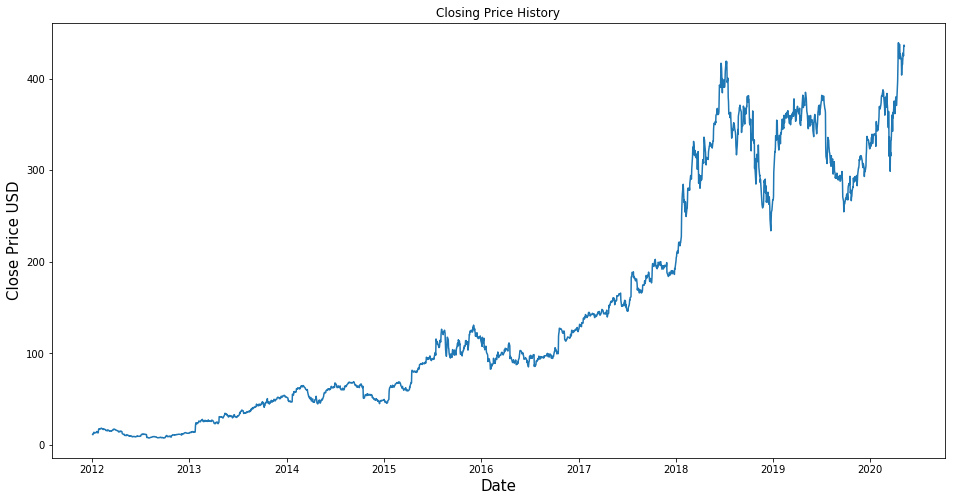

In [14]:
# visualzing the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(data['price_t'])
plt.xlabel('Date', fontsize = 15)
plt.ylabel("Close Price USD" , fontsize = 15)
plt.show()

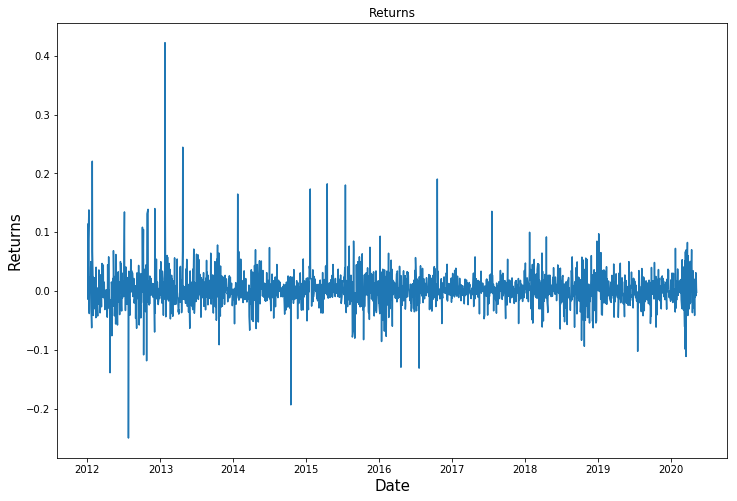

In [15]:
# visualzing the closing price history
plt.figure(figsize=(12,8))
plt.title('Returns')
plt.plot(data['returns'])
plt.xlabel('Date', fontsize = 15)
plt.ylabel("Returns" , fontsize = 15)
plt.show()

In [16]:
expected_returns = data['returns'].mean()

In [17]:
expected_returns*100

0.22556200526448653

### Expected returns are quite high

In [18]:
data['expected_returns'] = expected_returns

In [19]:
data.head()

,price_t,price_t-1,returns,expected_returns
Date,,,,
2012-01-04,11.492857,10.320000,0.113649,0.002256
2012-01-05,11.328571,11.492857,-0.014295,0.002256
2012-01-06,12.327143,11.328571,0.088146,0.002256
2012-01-09,14.025714,12.327143,0.137791,0.002256
2012-01-10,13.690000,14.025714,-0.023936,0.002256


(array([734138., 734503., 734869., 735234., 735599., 735964., 736330.,
        736695., 737060., 737425.]), <a list of 10 Text xticklabel objects>)

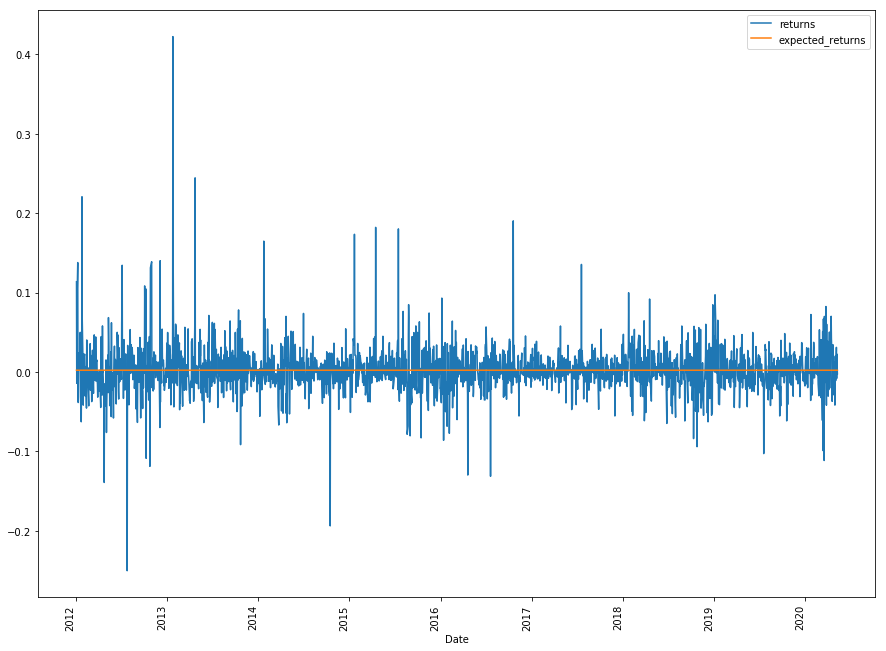

In [20]:
data[['returns' , 'expected_returns']].plot(figsize  = (15,12))
plt.xticks(rotation = 90)

## Exploring moving averages

In [21]:
data['moving_avg_30_days'] = data['returns'].rolling(30).mean()

In [22]:
data['moving_avg_7_days'] = data['returns'].rolling(7).mean()

In [23]:
data.head()

,price_t,price_t-1,returns,expected_returns,moving_avg_30_days,moving_avg_7_days
Date,,,,,,
2012-01-04,11.492857,10.320000,0.113649,0.002256,NaN,NaN
2012-01-05,11.328571,11.492857,-0.014295,0.002256,NaN,NaN
2012-01-06,12.327143,11.328571,0.088146,0.002256,NaN,NaN
2012-01-09,14.025714,12.327143,0.137791,0.002256,NaN,NaN
2012-01-10,13.690000,14.025714,-0.023936,0.002256,NaN,NaN


In [24]:
data[30:35]

,price_t,price_t-1,returns,expected_returns,moving_avg_30_days,moving_avg_7_days
Date,,,,,,
2012-02-16,17.415714,17.437143,-0.001229,0.002256,0.015401,-0.006486
2012-02-17,17.407143,17.415714,-0.000492,0.002256,0.015861,-0.002222
2012-02-21,16.771429,17.407143,-0.036520,0.002256,0.011705,-0.008406
2012-02-22,16.057142,16.771429,-0.042590,0.002256,0.005693,-0.013449
2012-02-23,16.141428,16.057142,0.005249,0.002256,0.006665,-0.006210


(array([734138., 734503., 734869., 735234., 735599., 735964., 736330.,
        736695., 737060., 737425.]), <a list of 10 Text xticklabel objects>)

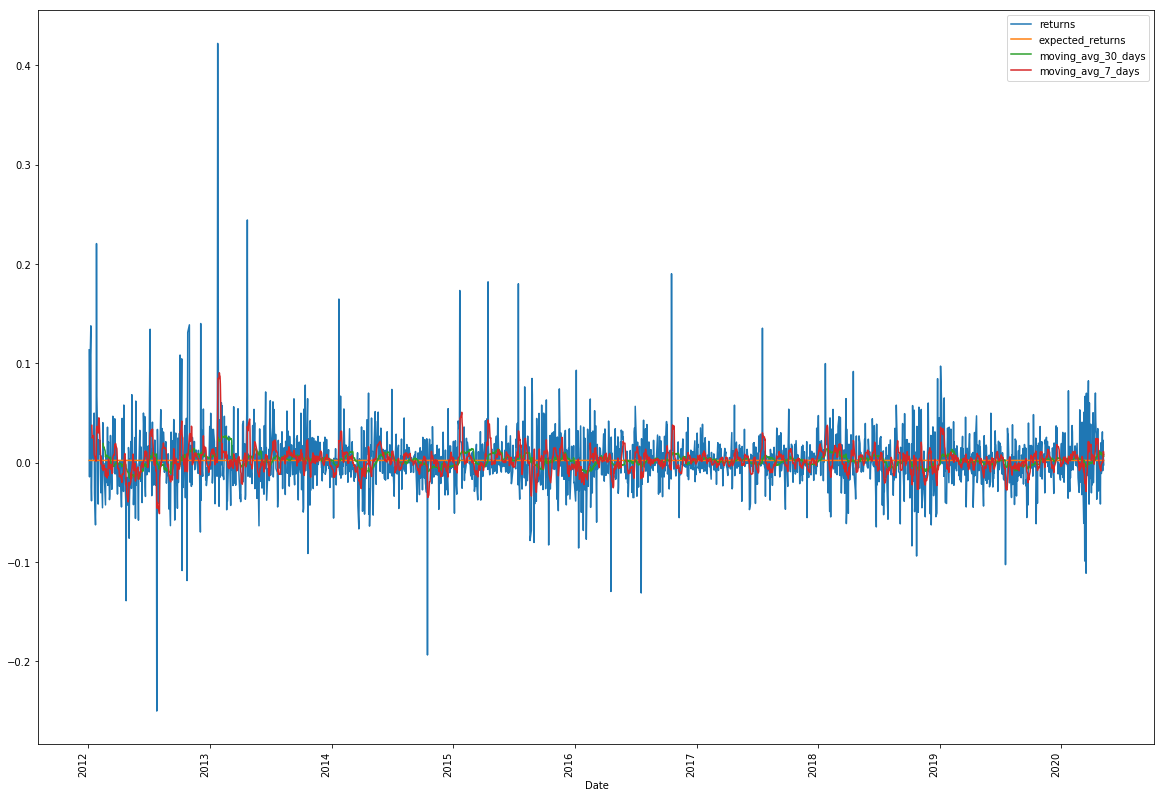

In [25]:
data[['returns' , 'expected_returns','moving_avg_30_days','moving_avg_7_days']].plot(figsize  = (20,15))
plt.xticks(rotation = 90)

## Estimating standard deviations

In [26]:
# Calculate the deviations for each return observation
data['deviations'] = data['returns'] - data['expected_returns']

In [27]:
# Calculate the squared deviations for each observation
data['squared_deviations'] = data['deviations'] ** 2

In [28]:
data.head()

,price_t,price_t-1,returns,expected_returns,moving_avg_30_days,moving_avg_7_days,deviations,squared_deviations
Date,,,,,,,,
2012-01-04,11.492857,10.320000,0.113649,0.002256,NaN,NaN,0.111393,0.012408
2012-01-05,11.328571,11.492857,-0.014295,0.002256,NaN,NaN,-0.016550,0.000274
2012-01-06,12.327143,11.328571,0.088146,0.002256,NaN,NaN,0.085891,0.007377
2012-01-09,14.025714,12.327143,0.137791,0.002256,NaN,NaN,0.135536,0.018370
2012-01-10,13.690000,14.025714,-0.023936,0.002256,NaN,NaN,-0.026191,0.000686


In [29]:
# Sum of squared deviations
sum(data['squared_deviations'].dropna())

2.037280079600479

In [30]:
sum_squared_deviations = np.sum(data['squared_deviations'])

In [31]:
# Estimate the variance as the sum of squared deviations divided by N - 1,
#     where N = len(data['squared_deviations'].dropna())
var_manual = sum_squared_deviations / (len(data['squared_deviations'].dropna()) - 1)

In [32]:
var_manual

0.0009705955596000364

In [33]:
# Annualised Expected Return using the 'crude' method
(data['returns'].mean()) * 250

0.5639050131612163

In [34]:
# Annualised Expected Return using the 'sophisticated' method
(1 + data['returns'].mean()) ** 250 - 1

0.7564065521965866

In [35]:
data.rename(columns={'price_t':'Adj Close'}, inplace=True)

In [36]:
data.head()

,Adj Close,price_t-1,returns,expected_returns,moving_avg_30_days,moving_avg_7_days,deviations,squared_deviations
Date,,,,,,,,
2012-01-04,11.492857,10.320000,0.113649,0.002256,NaN,NaN,0.111393,0.012408
2012-01-05,11.328571,11.492857,-0.014295,0.002256,NaN,NaN,-0.016550,0.000274
2012-01-06,12.327143,11.328571,0.088146,0.002256,NaN,NaN,0.085891,0.007377
2012-01-09,14.025714,12.327143,0.137791,0.002256,NaN,NaN,0.135536,0.018370
2012-01-10,13.690000,14.025714,-0.023936,0.002256,NaN,NaN,-0.026191,0.000686


In [37]:
## create a new dataframe with only 'adj close' column
data = data[['Adj Close']]

In [38]:
data.head()

,Adj Close
Date,
2012-01-04,11.492857
2012-01-05,11.328571
2012-01-06,12.327143
2012-01-09,14.025714
2012-01-10,13.690000


In [39]:
# Convert the dataframe into numpy array
dataset = data.values

In [40]:
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1680

## Scale the data

In [41]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00882336],
       [0.00844262],
       [0.01075689],
       ...,
       [0.98862067],
       [0.99388155],
       [0.9916103 ]])

In [42]:
# Creating a scaled training data
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train
x_train = []
y_train = []

for i in range(60 , len(train_data)):
    x_train.append(train_data[i-60:i , 0])
    y_train.append(train_data[i,0])
    
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.00882336, 0.00844262, 0.01075689, 0.01469347, 0.01391542,
       0.01269704, 0.01269704, 0.01343535, 0.01354792, 0.01481266,
       0.01644158, 0.0153755 , 0.0132963 , 0.0128692 , 0.01365387,
       0.02059668, 0.0231725 , 0.02371548, 0.02198392, 0.02290101,
       0.02324203, 0.02404656, 0.02498022, 0.02452663, 0.02324203,
       0.02352014, 0.02321886, 0.02135486, 0.02293412, 0.02259973,
       0.02255007, 0.0225302 , 0.02105688, 0.01940147, 0.01959681,
       0.01915978, 0.01841153, 0.01970607, 0.01884856, 0.01951735,
       0.02029539, 0.01887505, 0.01765666, 0.01701436, 0.01796788,
       0.01831883, 0.01734875, 0.01739841, 0.01703422, 0.01866315,
       0.01859362, 0.02004046, 0.02026891, 0.02195081, 0.02149722,
       0.0219806 , 0.02257655, 0.02213952, 0.02152371, 0.02027884])]
[0.020275527729000754]



### Convert x_train and y_train into numpy array

In [43]:
x_train , y_train  = np.array(x_train) , np.array(y_train)

In [44]:
### Reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0] , x_train.shape[1] , 1))
x_train.shape

(1620, 60, 1)

## Build LSTM Model

In [45]:
model =Sequential()
model.add(LSTM(50 , return_sequences = True , input_shape = (x_train.shape[1] ,1)))
model.add(LSTM(50 , return_sequences = True , input_shape = (x_train.shape[1] ,1)))
model.add(LSTM (50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(25))
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


### Complie the model

In [46]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

### Train the model

In [47]:
model.fit(x_train , y_train , batch_size=1 , epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1620/1620 [==============================] - 237s 146ms/step - loss: 0.0025s - loss: 0
Epoch 2/5
1620/1620 [==============================] - 234s 144ms/step - loss: 0.0012
Epoch 3/5
1620/1620 [==============================] - 232s 143ms/step - loss: 9.3804e-04
Epoch 4/5
1620/1620 [==============================] - 232s 143ms/step - loss: 6.3170e-04
Epoch 5/5
1620/1620 [==============================] - 230s 142ms/step - loss: 5.6062e-04


 ## Creating the test data

In [48]:
test_data = scaled_data[training_data_len-60: , :]

### Creating x_test and y_test

In [49]:
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60 , len(test_data)):
    x_test.append(test_data[i-60:i , 0])

In [50]:
## convert the data into numpy array
x_test  = np.array(x_test)

In [51]:
## Reshaping the data
x_test = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1] , 1 ))
x_test.shape

(420, 60, 1)

## Predictions

In [52]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [53]:
rmse = np.sqrt( np.mean(predictions  - y_test)**2)
rmse

9.288281467982701

## Plot the data

In [54]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


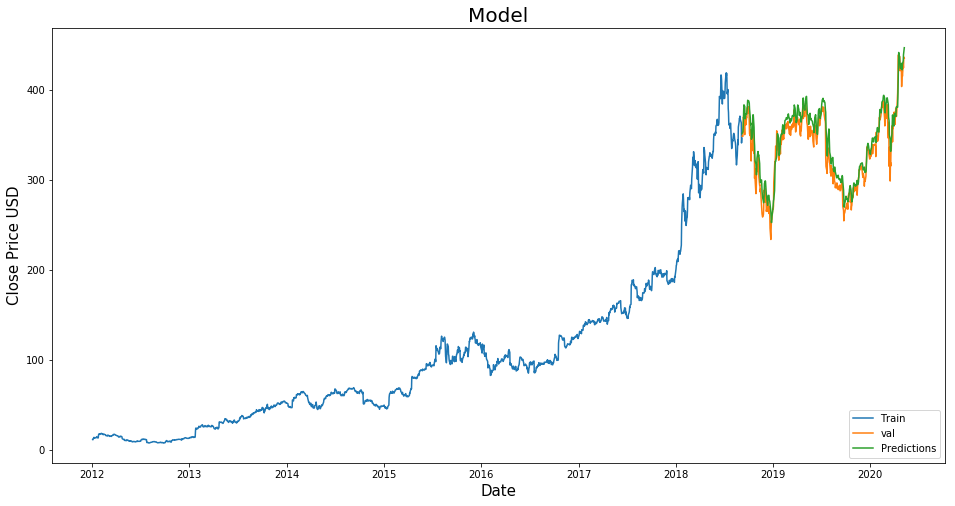

In [55]:
## visualize the data
plt.figure(figsize=(16,8))
plt.title('Model', fontsize =20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Close Price USD' , fontsize= 15)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train' ,'val' ,'Predictions'], loc = 'lower right')
plt.show()

In [56]:
valid

,Adj Close,Predictions
Date,,
2018-09-07,348.679993,351.628998
2018-09-10,348.410004,353.565094
2018-09-11,355.929993,358.563080
2018-09-12,369.950012,366.088715
2018-09-13,368.149994,377.367340
2018-09-14,364.559998,383.538361
2018-09-17,350.350006,381.737183
2018-09-18,367.649994,370.377808
2018-09-19,366.959991,367.956970


In [61]:
## Get the quote
nflx_quote = dr.get_data_yahoo('NFLX', start = '2012-01-01', end = '2020-05-05')
new_df = nflx_quote[['Adj Close']]
new_df.head()

,Adj Close
Date,
2012-01-03,10.320000
2012-01-04,11.492857
2012-01-05,11.328571
2012-01-06,12.327143
2012-01-09,14.025714


In [62]:
#Get the last 60 days closing price and convert them into array
last_60_days = new_df[-60:].values
# Scale the data
last_60_days_scaled = scaler.transform(last_60_days)

In [63]:
x_test =[]
x_test.append(last_60_days_scaled)
## Convert it into numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# Get the predicted price
pred_price = model.predict(x_test)
## inverse xscaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[441.87085]]


In [66]:
nflx_quote_new = dr.get_data_yahoo('NFLX', start = '2020-05-06', end = '2020-05-06')
print(nflx_quote_new["Adj Close"])

Date
2020-05-05    424.679993
2020-05-06    434.260010
Name: Adj Close, dtype: float64


### Predicted stock price of Netflix on 6th may 2020 was 441.87 and actual price wan 434.3